# Setting up project and requirements

In [1]:
!ls

char_map.py	     LICENSE.txt       RNN_LSTM_Speech_Recognition.ipynb
CODEOWNERS	     main.ipynb        sample_models.py
create_desc_json.py  Models.py	       train_corpus.json
data_generator.py    predictor.py      train_utils.py
flac_to_wav.sh	     __pycache__       utils.py
images		     README.md	       valid_corpus.json
LibriSpeech	     requirements.txt  vui_notebook.ipynb


In [2]:
# !git clone https://github.com/Nabin19677/Speech-Recogniton-LSTM.git SpeechRecognition
%ls
# %cd SpeechRecognition

char_map.py          LICENSE.txt       RNN_LSTM_Speech_Recognition.ipynb
CODEOWNERS           main.ipynb        sample_models.py
create_desc_json.py  Models.py         train_corpus.json
data_generator.py    predictor.py      train_utils.py
flac_to_wav.sh*      __pycache__/      utils.py
images/              README.md         valid_corpus.json
LibriSpeech/         requirements.txt  vui_notebook.ipynb


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# %cd /content/drive/My Drive/Colab Notebooks/SpeechRecognition

In [5]:
# %cd SpeechRecognition

In [6]:
#Fetch latest on repo.
!git fetch
!git pull

Already up to date.


In [7]:
#Install requirements.
!pip install tensorflow-gpu==1.14
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
#Fixing extra requirements.
!pip install keras librosa opencv-python imgaug

Defaulting to user installation because normal site-packages is not writeable


In [9]:
#Changing keras backend to tensorflow support and installing ffmeg
# !sudo apt update
# !sudo apt upgrade
!KERAS_BACKEND=tensorflow python -c "from keras import backend"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ImportError: No module named keras


# Downloading Data

In [10]:
#Download base training and testing dataset
#Extracting and removing compressed file.

!wget http://www.openslr.org/resources/12/train-clean-100.tar.gz
!tar -xzvf train-clean-100.tar.gz
!rm -rf train-clean-100.tar.gz

!wget http://www.openslr.org/resources/12/test-clean.tar.gz
!tar -xzvf test-clean.tar.gz
!rm -rf test-clean.tar.gz

--2020-02-26 23:20:35--  http://www.openslr.org/resources/12/train-clean-100.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘train-clean-100.tar.gz’

train-clean-100.tar   0%[                    ]   4.77M   162KB/s    eta 16h 28m^C
LibriSpeech/LICENSE.TXT
LibriSpeech/README.TXT
LibriSpeech/CHAPTERS.TXT
LibriSpeech/SPEAKERS.TXT
LibriSpeech/BOOKS.TXT
LibriSpeech/train-clean-100/
LibriSpeech/train-clean-100/374/
LibriSpeech/train-clean-100/374/180298/
LibriSpeech/train-clean-100/374/180298/374-180298-0021.flac
LibriSpeech/train-clean-100/374/180298/374-180298-0038.flac
LibriSpeech/train-clean-100/374/180298/374-180298-0022.flac
LibriSpeech/train-clean-100/374/180298/374-180298-0044.flac
LibriSpeech/train-clean-100/374/180298/374-180298-0006.flac
LibriSpeech/train-clean-100/374/180298/37

In [11]:
#Moving script file (i.e. ShellScript which converts .flac to .wav) to LibriSpeech dataset folder.
!mv flac_to_wav.sh LibriSpeech

# **Other Data-Set for training**
**Train- 360 hours, 500 hours data**

**Test other**

In [12]:
#Downloading other data set for extra bit of training
# !wget http://www.openslr.org/resources/12/train-clean-360.tar.gz
# !tar -xzvf train-clean-360.tar.gz
# !rm -rf train-clean-360.tar.gz

# !wget http://www.openslr.org/resources/12/train-other-500.tar.gz
# !tar -xzvf train-other-500.tar.gz
# !rm -rf train-other-500.tar.gz

# !wget http://www.openslr.org/resources/12/test-other.tar.gz
# !tar -xzvf test-other.tar.gz
# !rm -rf test-other.tar.gz

# **Change Media type flac to wav**

In [13]:
#Download and instrall libav-tools
!wget http://launchpadlibrarian.net/348889634/libav-tools_3.4.1-1_all.deb
!sudo dpkg -i libav-tools_3.4.1-1_all.deb

--2020-02-26 23:21:30--  http://launchpadlibrarian.net/348889634/libav-tools_3.4.1-1_all.deb
Resolving launchpadlibrarian.net (launchpadlibrarian.net)... 91.189.89.228, 91.189.89.229, 2001:67c:1560:8003::8007, ...
Connecting to launchpadlibrarian.net (launchpadlibrarian.net)|91.189.89.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15844 (15K) [application/x-debian-package]
Saving to: ‘libav-tools_3.4.1-1_all.deb’

libav-tools_3.4.1-1 100%[===================>]  15.47K  71.4KB/s    in 0.2s    

2020-02-26 23:21:31 (71.4 KB/s) - ‘libav-tools_3.4.1-1_all.deb’ saved [15844/15844]

[sudo] password for nabeen: 


In [14]:
#Running ShellScript to change .flac to .wav in LibriSpeech Folder
!chmod +x ./LibriSpeech/flac_to_wav.sh
!./LibriSpeech/flac_to_wav.sh


     21      21    1302
ffmpeg version 4.1.4-1build2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.2.1-4ubuntu1)
  configuration: --prefix=/usr --extra-version=1build2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-lib

size=     491kB time=00:00:15.72 bitrate= 256.0kbits/s speed= 847x    
video:0kB audio:491kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.015501%
./LibriSpeech/train-clean-100/374/180298/374-180298-0044.flac has been deleted
ffmpeg version 4.1.4-1build2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.2.1-4ubuntu1)
  configuration: --prefix=/usr --extra-version=1build2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-

./LibriSpeech/train-clean-100/374/180298/374-180298-0043.flac has been deleted
ffmpeg version 4.1.4-1build2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.2.1-4ubuntu1)
  configuration: --prefix=/usr --extra-version=1build2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheo

ffmpeg version 4.1.4-1build2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.2.1-4ubuntu1)
  configuration: --prefix=/usr --extra-version=1build2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx -

size=     432kB time=00:00:13.82 bitrate= 256.0kbits/s speed= 291x    
video:0kB audio:432kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.017631%
./LibriSpeech/train-clean-100/374/180298/374-180298-0036.flac has been deleted
ffmpeg version 4.1.4-1build2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.2.1-4ubuntu1)
  configuration: --prefix=/usr --extra-version=1build2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-

ffmpeg version 4.1.4-1build2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.2.1-4ubuntu1)
  configuration: --prefix=/usr --extra-version=1build2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx -

In [ ]:
#Create JSON-Description for train-clean-100 and test-clean for training and validation
# !python create_desc_json.py /LibriSpeech/train-clean-100/ train_corpus.json
!python create_desc_json.py LibriSpeech/test-clean/ valid_corpus.json

**Creating desc for other training data set.**

In [16]:
#Create JSON-Description for other datasets for training and validation
# !python create_desc_json.py LibriSpeech/train-clean-360/ train_corpus.json
# !python create_desc_json.py LibriSpeech/train-other-500/ train_corpus.json
# !python create_desc_json.py LibriSpeech/test-other/ valid_corpus.json

# **Setting up model and training**

In [17]:
from data_generator import vis_train_features

# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 5366 total training examples.


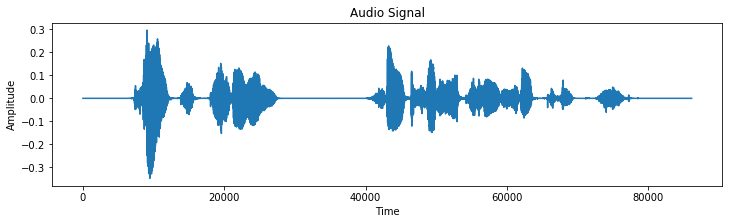

**Shape of Audio Signal** : (86107,)

**Transcript** : part two some christian subjects

In [18]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

STEP 1: Acoustic Features for Speech Recognition

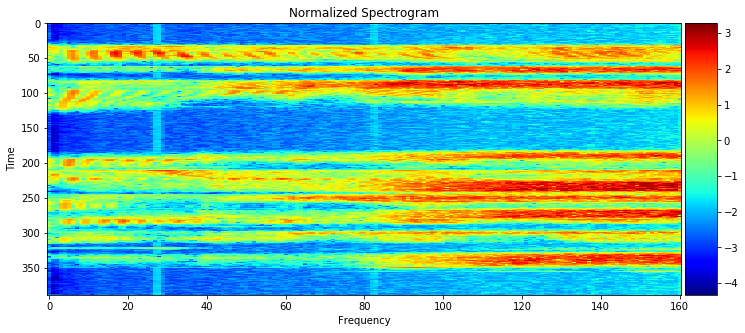

**Shape of Spectrogram** : (389, 161)

In [19]:
from data_generator import plot_spectrogram_feature

# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

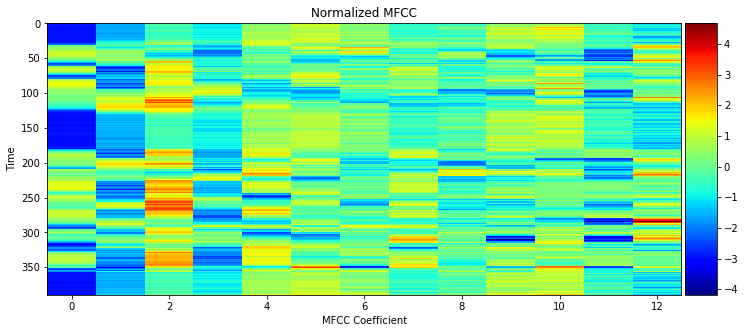

**Shape of MFCC** : (390, 13)

In [20]:
from data_generator import plot_mfcc_feature

# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

In [21]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
set_session(tf.Session(config=config))

# watch for any changes in the sample_models module, and reload it automatically
%load_ext autoreload
%autoreload 2
# import NN architectures for speech recognition
from Models import *
# import function for training acoustic model
from train_utils import train_model

Using TensorFlow backend.
/home/nabeen/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nabeen/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nabeen/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nabeen/.local/lib/python3.7/site-packages/tensorflow/python

In [22]:
# model_0 = simple_rnn_model(input_dim=161)

In [23]:
# train_model(input_to_softmax=model_0, 
#             pickle_path='model_0.pickle', 
#             save_model_path='model_0.h5',
#             spectrogram=True)

In [24]:
#using mfcc feature extractor with dimensionality of 13
# model_1 = simple_rnn_model(input_dim=13)

In [25]:
# train_model(input_to_softmax=model_1, 
#             pickle_path='model_1.pickle', 
#             save_model_path='model_1.h5',
#             spectrogram=False) 

In [59]:
#Using Graves purposed RNN_model from example
model_2 = final_model(input_dim=13,
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=250,
                        activation='relu',
                        cell=GRU,
                        dropout_rate=1,
                        number_of_layers=2)

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
final_layer_of_rnn (GRU)     (None, None, 250)         375750    
_________________________________________________________________
bt_rnn_final (BatchNormaliza (None, None, 250)         100

In [58]:
from keras.optimizers import RMSprop
train_model(input_to_softmax=model_2, 
            pickle_path='model_2.pickle',
            save_model_path='model_2.h5', 
            spectrogram=False)

Epoch 1/20


ValueError: Error when checking input: expected the_input to have shape (None, 161) but got array with shape (980, 13)

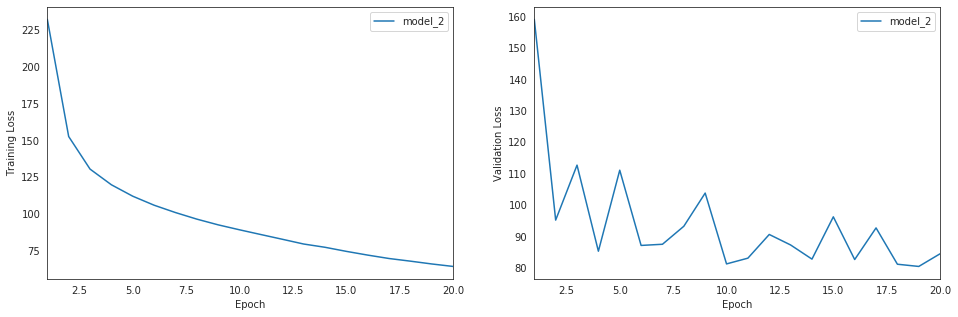

In [61]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

# obtain the paths for the saved model history
all_pickles = sorted(glob("results/*.pickle"))
# extract the name of each model
model_names = [item[8:-7] for item in all_pickles]
# extract the loss history for each model
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
# save the number of epochs used to train each model
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

# plot the training loss vs. epoch for each model
ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [65]:
from predictor import *
get_predictions(index=0, 
                partition='validation',
                input_to_softmax=final_model(input_dim=13,
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=250), 
                model_path='./results/model_2.h5')

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
final_layer_of_rnn (GRU)     (None, None, 250)         375750    
_________________________________________________________________
bt_rnn_final (BatchNormaliza (None, None, 250)         100

ValueError: Error when checking input: expected the_input to have shape (None, 13) but got array with shape (606, 161)